In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage.feature import local_binary_pattern
class LBP_Feature_Extractor:
    @staticmethod
    def get_pixel(img, center, x, y):
        new_value = 0
        try:
            if img[x][y] >= center:
                new_value = 1
        except:
            pass
        return new_value
    @staticmethod
    def lbp_calculated_pixel(img, x, y):
        '''

         64 | 128 |   1
        ----------------
         32 |   0 |   2
        ----------------
         16 |   8 |   4    

        '''    
        center = img[x][y]
        val_ar = []
        val_ar.append(LBP_Feature_Extractor.get_pixel(img, center, x-1, y+1))     # top_right
        val_ar.append(LBP_Feature_Extractor.get_pixel(img, center, x, y+1))       # right
        val_ar.append(LBP_Feature_Extractor.get_pixel(img, center, x+1, y+1))     # bottom_right
        val_ar.append(LBP_Feature_Extractor.get_pixel(img, center, x+1, y))       # bottom
        val_ar.append(LBP_Feature_Extractor.get_pixel(img, center, x+1, y-1))     # bottom_left
        val_ar.append(LBP_Feature_Extractor.get_pixel(img, center, x, y-1))       # left
        val_ar.append(LBP_Feature_Extractor.get_pixel(img, center, x-1, y-1))     # top_left
        val_ar.append(LBP_Feature_Extractor.get_pixel(img, center, x-1, y))       # top

        power_val = [1, 2, 4, 8, 16, 32, 64, 128]
        val = 0
        for i in range(len(val_ar)):
            val += val_ar[i] * power_val[i]
        return val    
    @staticmethod
    def show_output(output_list):
        output_list_len = len(output_list)
        figure = plt.figure()
        for i in range(output_list_len):
            current_dict = output_list[i]
            current_img = current_dict["img"]
            current_xlabel = current_dict["xlabel"]
            current_ylabel = current_dict["ylabel"]
            current_xtick = current_dict["xtick"]
            current_ytick = current_dict["ytick"]
            current_title = current_dict["title"]
            current_type = current_dict["type"]
            current_plot = figure.add_subplot(1, output_list_len, i+1)
            if current_type == "gray":
                current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
                current_plot.set_title(current_title)
                current_plot.set_xticks(current_xtick)
                current_plot.set_yticks(current_ytick)
                current_plot.set_xlabel(current_xlabel)
                current_plot.set_ylabel(current_ylabel)
            elif current_type == "histogram":
                current_plot.plot(current_img, color = "black")
                current_plot.set_xlim([0,260])
                current_plot.set_title(current_title)
                current_plot.set_xlabel(current_xlabel)
                current_plot.set_ylabel(current_ylabel)            
                ytick_list = [int(i) for i in current_plot.get_yticks()]
                current_plot.set_yticklabels(ytick_list,rotation = 90)
        plt.show()
    @staticmethod
    def crop_LBP(im, height, width):
        imgwidth, imgheight= im.shape
        images=[]
        for i in range(0,imgheight,height):
            for j in range(0,imgwidth,width):
                a = im[j:(j + width), i:(i + height)]
                images.append(a)
        return images
    @staticmethod
    def LBP_pipeline(inputImage,writer_id,x_train,y_train,show_histogram=False,crop=False):
        cropped_images = []
        if crop :
            cropped_images=LBP_Feature_Extractor.crop_LBP(inputImage,128,256)
            cropped_images=cropped_images[0:9]
        else:
            cropped_images.append(inputImage)
        for image in cropped_images:
#            height, width,channel = img_gray.shape
#            img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
#            img_lbp = np.zeros((height, width,3), np.uint8)
#             for i in range(0, height):
#                 for j in range(0, width):
#                      img_lbp[i, j] = LBP_Feature_Extractor.lbp_calculated_pixel(img_gray, i, j)

            img_lbp = local_binary_pattern(image, 8, 3, 'default')
#            hist_lbp = cv2.calcHist(img_lbp, [0], None, [256], [0, 256])
            hist_lbp, _ = np.histogram(img_lbp, density=True, bins=256, range=(0, 256))
            if show_histogram:
                LBP_Feature_Extractor.show_histogram_LBP(image,img_lbp,hist_lbp)
            x_train.append(hist_lbp)
            y_train.append(writer_id)
        return x_train,y_train
    @staticmethod
    def show_histogram_LBP(img_gray,img_lbp,hist_lbp):
            output_list = []
            output_list.append({
                "img": img_gray,
                "xlabel": "",
                "ylabel": "",
                "xtick": [],
                "ytick": [],
                "title": "Gray Image",
                "type": "gray"        
            })
            output_list.append({
                "img": img_lbp,
                "xlabel": "",
                "ylabel": "",
                "xtick": [],
                "ytick": [],
                "title": "LBP Image",
                "type": "gray"
            })    
            output_list.append({
                "img": hist_lbp,
                "xlabel": "Bins",
                "ylabel": "Number of pixels",
                "xtick": None,
                "ytick": None,
                "title": "Histogram(LBP)",
                "type": "histogram"
            })
            LBP_Feature_Extractor.show_output(output_list)
    @staticmethod
    def show_images(images,titles=None):
        #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
        # images[0] will be drawn with the title titles[0] if exists
        # You aren't required to understand this function, use it as-is.
        n_ims = len(images)
        if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
        fig = plt.figure(figsize=(15,15))
        n = 1
        for image,title in zip(images,titles):
            a = fig.add_subplot(1,n_ims,n)
            if image.ndim == 2: 
                plt.gray()
            plt.imshow(image)
            a.set_title(title)
            n += 1
        fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
        plt.show()
    @staticmethod
    def get_accuracy(results,y_test):
        correct=0
        false=[]
        for i in range(len(results)):
            if(results[i]==y_test[i]):
                correct+=1
            else:
                false.append(i)
        return (correct/len(results))*100,false

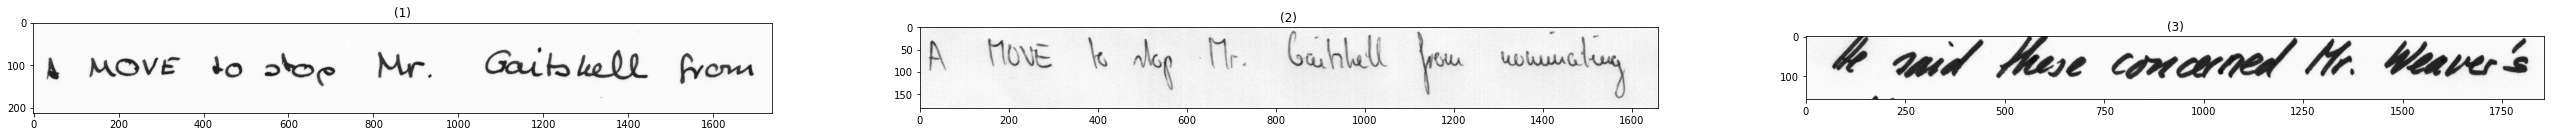

In [67]:
# ext=LBP_Feature_Extractor()
# images=[]
# image=cv2.imread("0_1.png")
# images.append(image)
# image=cv2.imread("1_1.png")
# images.append(image)
# image=cv2.imread("13_1.png")
# images.append(image)
# ext.show_images(images)
# writer_ids=["0","1","13"]
# x_train=[]
# y_train=[]
# for i in range(len(images)):
#     x_train,y_train=ext.LBP_pipeline(images[i],writer_ids[i],x_train,y_train,show_histogram=False)

In [77]:
# images2=[]
# image2=cv2.imread("7.png")
# images2.append(image2)
# x_test=[]
# y_test=[]
# writer_ids=["13"]
# for i in range(len(images2)):
#     x_test,y_test=ext.LBP_pipeline(images2[i],writer_ids[i],x_test,y_test,show_histogram=False)

In [78]:
# x_train=np.asarray(x_train)
# y_train=np.asarray(y_train)
# x_test=np.asarray(x_test)
# print(x_train.shape)
# print(y_train.shape)
# clf = svm.SVC()
# clf.fit(x_train[:,:,0], y_train)
# results=clf.predict(x_test[:,:,0])


(27, 256, 1)
(27,)


In [79]:
# accuracy,false=ext.get_accuracy(results,y_test)
# print(accuracy,"%")
# print(false)

100.0 %
[]


In [76]:
# print(results)

['13' '13' '13' '13' '13' '13' '13' '13' '13']
